In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col,when,sum,avg,row_number
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession

#create session
spark=SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema= StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.format("csv") \
    .option("header", "true") \
    .schema(ball_by_ball_schema) \
    .load("s3://ipl-data-mayank/IPL Ball-by-Ball Dataset/raghu543-ipl-data-till-2017/Ball_By_Ball.csv")



In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Used IntegerType for year as Spark doesn't have YearType
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.format("csv") \
    .option("header", "true") \
    .schema(match_schema) \
    .load("s3://ipl-data-mayank/IPL Ball-by-Ball Dataset/raghu543-ipl-data-till-2017/Match.csv")


In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read.format("csv") \
    .option("header", "true") \
    .schema(player_schema) \
    .load("s3://ipl-data-mayank/IPL Ball-by-Ball Dataset/raghu543-ipl-data-till-2017/Player.csv")

In [0]:

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-mayank/IPL Ball-by-Ball Dataset/raghu543-ipl-data-till-2017/Player_match.csv")

     

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-mayank/IPL Ball-by-Ball Dataset/raghu543-ipl-data-till-2017/Team.csv")
     

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs")==0))

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_average_runs= ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
#Calculate running total of runs in each match for each over (using Window functions)
windowSpec= Window.partitionBy("match_id","innings_no").orderBy("over_id")
ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df=ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6 ) | (col("bowler_wicket")== True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year,month,dayofmonth,when
# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df=match_df.withColumn(
    "win_margin_category",
    when(col("win_margin")>100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:

ball_by_ball_df.columns

Out[42]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
    player_name,
    season_year,
    total_runs
FROM (
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs,
        ROW_NUMBER() OVER (PARTITION BY m.season_year ORDER BY SUM(b.runs_scored) DESC) AS rank
    FROM 
        ball_by_ball b
    JOIN 
        match m ON b.match_id = m.match_id   
    JOIN 
        player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
    JOIN 
        player p ON p.player_id = pm.player_id
    GROUP BY 
        p.player_name, m.season_year
) ranked
WHERE rank = 1
ORDER BY season_year;
""")

top_scoring_batsmen_per_season.show()


+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|    se marsh|       2008|       614|
|   ml hayden|       2009|       571|
|sr tendulkar|       2010|       615|
|    ch gayle|       2011|       598|
|    ch gayle|       2012|       720|
|  mek hussey|       2013|       732|
|  rv uthappa|       2014|       659|
|   da warner|       2015|       554|
|     v kohli|       2016|       962|
|   da warner|       2017|       634|
+------------+-----------+----------+



In [0]:
top_scoring_batsmen_per_season.show(10)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       399|
+-------------+-----------+----------+
only showing top 10 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

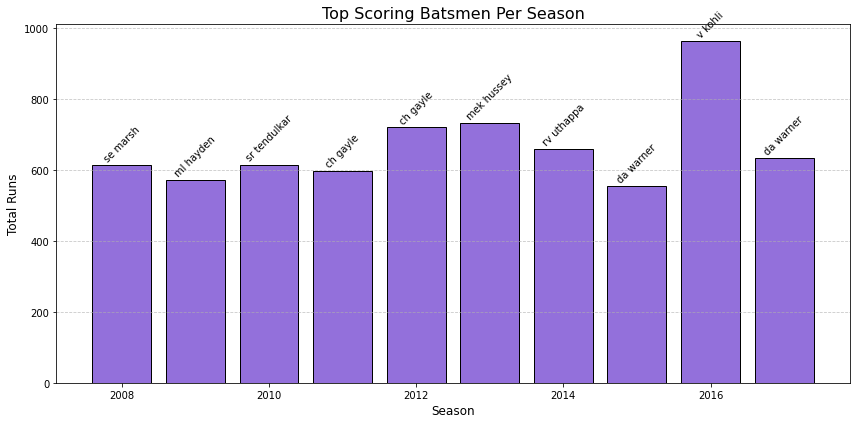

In [0]:
# The top scorers for each season
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_scorers['season_year'], top_scorers['total_runs'], color='mediumpurple', edgecolor='black')
for i in range(len(top_scorers)):
    plt.text(top_scorers['season_year'][i], top_scorers['total_runs'][i] + 10, 
             top_scorers['player_name'][i], ha='center', fontsize=10, rotation=45)
plt.title('Top Scoring Batsmen Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


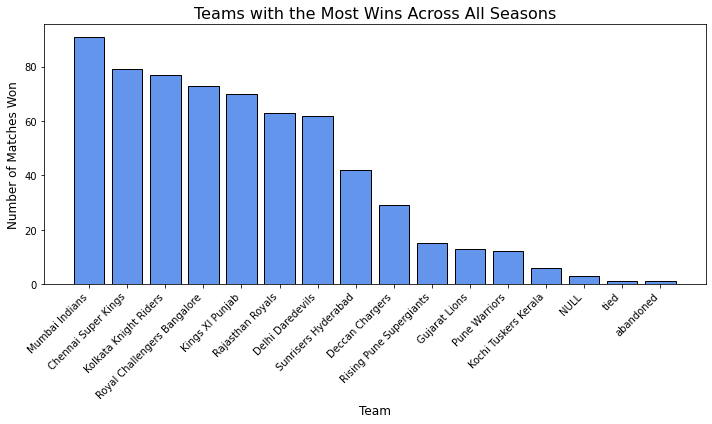

In [0]:
#Teams with most wins across all seasons
import matplotlib.pyplot as plt
# Executing the query
team_wins = spark.sql("""
SELECT match_winner, COUNT(*) AS total_wins
FROM match
WHERE match_winner IS NOT NULL
GROUP BY match_winner
ORDER BY total_wins DESC
""").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(team_wins['match_winner'], team_wins['total_wins'], color='cornflowerblue', edgecolor='black')
plt.title('Teams with the Most Wins Across All Seasons', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Matches Won', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [influence_percentage] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


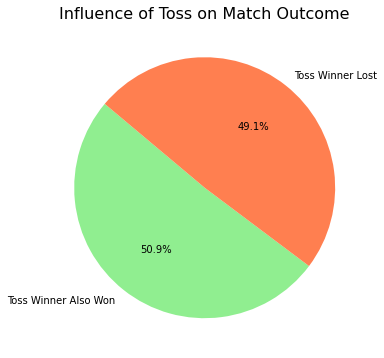

In [0]:
#How Often Does Winning the Toss Influence the Match Outcome?
toss_influence = spark.sql("""
SELECT
    COUNT(CASE WHEN toss_winner = match_winner THEN 1 END) AS toss_won_match,
    COUNT(*) AS total_matches,
    ROUND(COUNT(CASE WHEN toss_winner = match_winner THEN 1 END) * 100.0 / COUNT(*), 2) AS influence_percentage
FROM match
""").toPandas()

# Data for plot
labels = ['Toss Winner Also Won', 'Toss Winner Lost']
sizes = [toss_influence['toss_won_match'][0], toss_influence['total_matches'][0] - toss_influence['toss_won_match'][0]]
colors = ['lightgreen', 'coral']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Influence of Toss on Match Outcome', fontsize=16)
plt.show()


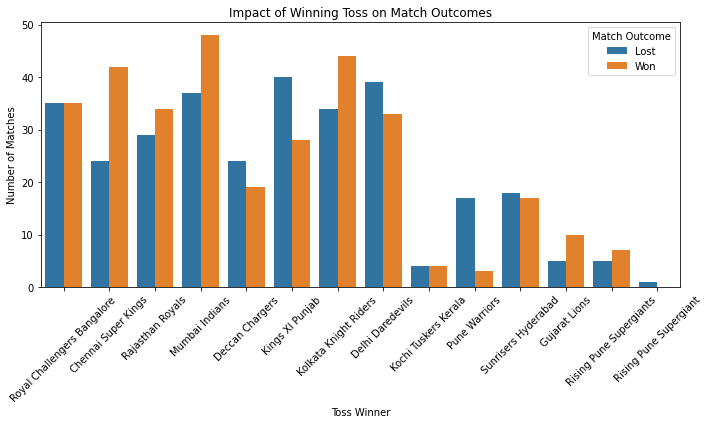

In [0]:
import seaborn as sns
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:

# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")


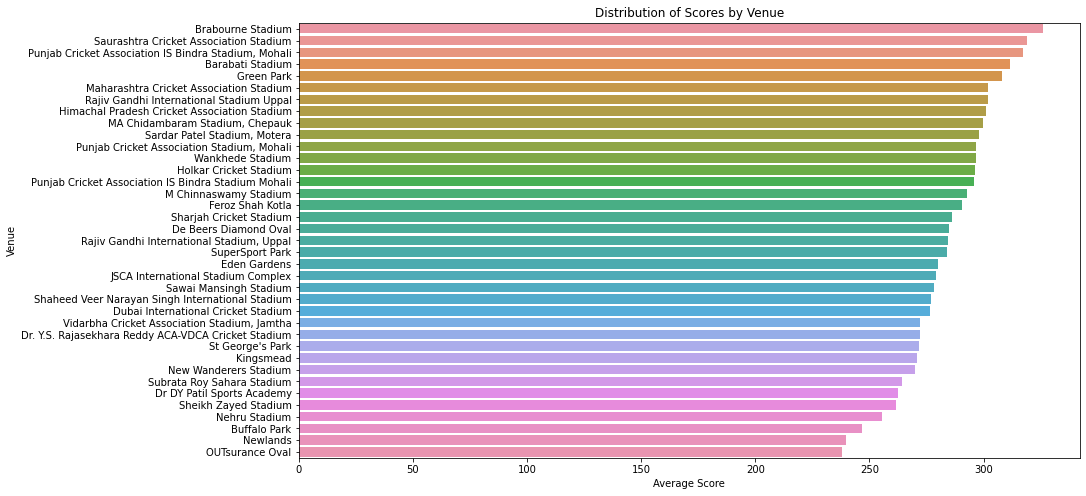

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()
     


In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


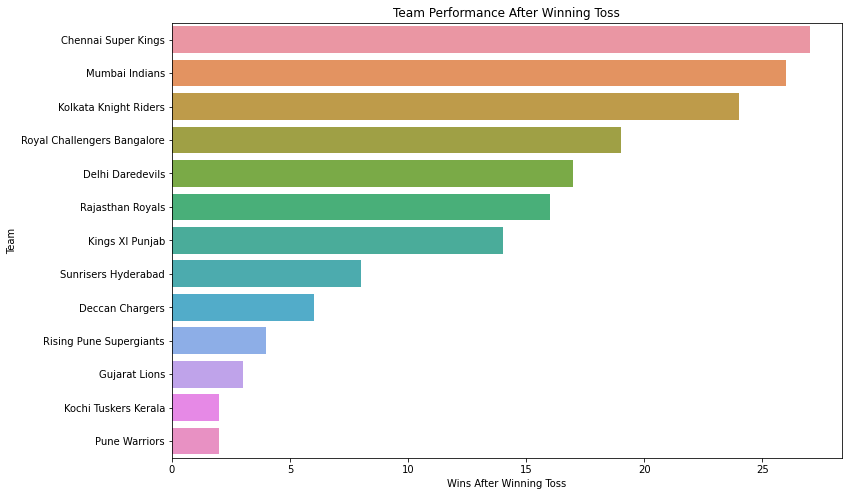

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
